# Notebook A3: Phase classification with neural networks: Sophisticated Methods

In this notebook, we are going to learn two more sophisticated methods to classify phases of matter. Specifically, we want to build models that are able to discover new physics without previous labelling. Specifically, we will learn 
1. [Learning by Confusion](https://doi.org/10.1038/nphys4037)
2. [Unsupervised learning with predictive models](https://doi.org/10.1088/1367-2630/ab7771).

**Authors:** Kenny Choo, Mark H. Fischer, Eliska Greplova

Adaptation for Summer School: ML in Quantum Physics and Chemistry (24.08.-03.09.2021, Warsaw) by Anna Dawid (e.g., introduction to methods)


In [1]:
# Tensorflow import
import tensorflow as tf
from tensorflow import keras

# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

print(tf.__version__)

2.6.0


In [2]:
# If you chose to clone GitHub repo:
!git clone https://github.com/Shmoo137/SummerSchool2021_MLinQuantum
folder = "/content/SummerSchool2021_MLinQuantum/A - Phase Classification (by Eliska Greplova)/Ising_data"

Cloning into 'SummerSchool2021_MLinQuantum'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 17 (delta 7), reused 15 (delta 5), pack-reused 0
Unpacking objects: 100% (17/17), done.


## 1. Learning by confusion

Learning by confusion is a ML scheme proposed by Evert van Nieuwenburg, Ye-Hua Liu, and Sebastian D. Huber in [this paper](https://doi.org/10.1038/nphys4037), where we use the supervised ML but avoid the need for labels. Ha! And you thought you knew what "supervised" meant![tekst linku](https://) 

## Step 1: Import data and analyze the data shape

The folder `Ising` contains Monte Carlo generated Ising configurations on the two-dimensional lattice. The data set is divided into training and test parts and corresponding label files containing the temperature, $T$, of each Monte Carlo sample.

### Example 1: Ising Spin Configuration Classification

The Ising model is given by the (classical) Hamiltonian:

\begin{align}
H(\boldsymbol{\sigma}) = -\sum_{<ij>} \sigma_{i}\sigma_{j},
\end{align}
where the spins $\sigma_{i} \in \lbrace -1, 1 \rbrace$ are binary variables living on the vertices of a square lattice and the sum is taken over nearest neighbours $<ij>$. 
  
At a given temperature $\beta = 1/T$, the probability of a configuration $\sigma$ is given by the Boltzmann distribution
  
\begin{align}
  P(\boldsymbol{\sigma}) = \frac{e^{-\beta H(\boldsymbol{\sigma})}}{Z},
 \end{align}
  
  where $Z$ is the partition function. This model exhibits a phase transition from the ferromagnetic phase at low tempertures to a paramagnetic phase at high temperatures. The transition temperature is $T_c \approx 2.2692$.
  
  **Task**
 
1.   Classify the ferromagnetic versus the paramagnetic phase of the Ising model
2.   Find the transition temperature
  
**Dataset**: Monte Carlo generated configurations on a 30x30 square lattice. The configuration are labelled by temperature.



In [3]:
N = 30 # linear dimension of the lattice 

ising_training_configs = np.load(folder + "/ising_training_configs_{0}x{0}.npy".format(N))
ising_training_labels = np.load(folder + "/ising_training_labels_{0}x{0}.npy".format(N))
ising_test_configs = np.load(folder + "/ising_test_configs_{0}x{0}.npy".format(N))
ising_test_labels = np.load(folder + "/ising_test_labels_{0}x{0}.npy".format(N))

print('train_images.shape =', ising_training_configs.shape)
print('train_labels.shape =', ising_training_labels.shape)
print('test_images.shape =', ising_test_configs.shape)
print('test_labels.shape =', ising_test_labels.shape)

train_images.shape = (1000, 30, 30)
train_labels.shape = (1000,)
test_images.shape = (1000, 30, 30)
test_labels.shape = (1000,)


## Step 2: Create many sets of training and test data with various critical temperature, $T_c$

e.g., try as many $T_c$ as you have test points.

## Step 3: Train $p$ DNNs on $p$ training sets and check their performance on $p$ test sets (created for different $T_c$)

e.g., try a DNN with one hidden layer of 32 neurons and Adam as an optimizer

(you can do Step 2 and 3 in one loop)

## Step 4: Plot the accuracies of $p$ trained DNNs vs. $T_c$ chosen to create their training and test sets

What do you see? What are advantages and disadvantages of the method?

In [4]:
Tp = list(set(ising_test_labels))
Tp.sort()
accuracies = []

train_images = ising_training_configs
test_images = ising_test_configs

for tp in Tp:
  # Label training set
  train_labels = []
  for i, label in enumerate(ising_training_labels):
      if label <= tp:
          train_labels.append(1)
      else:
          train_labels.append(0)
  train_labels = np.array(train_labels)
  
  # Label test set
  test_labels = []
  for i, label in enumerate(ising_test_labels):
      if label <= tp:
          test_labels.append(1)
      else:
          test_labels.append(0)
  test_labels = np.array(test_labels)
  
  # Define our model
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30, 30)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
  ])
  
  # Compile our model
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) 
  
  # Train
  model.fit(train_images, train_labels, epochs = 10, batch_size = 16, verbose=0)
  
  # Evaluate and save accuracy
  loss, acc = model.evaluate(test_images, test_labels, verbose=0)
  accuracies.append(acc)
  
  print("Tp = {:.2f}".format(tp))

Tp = 1.00
Tp = 1.13
Tp = 1.26
Tp = 1.39
Tp = 1.53
Tp = 1.66
Tp = 1.79
Tp = 1.92
Tp = 2.05
Tp = 2.18
Tp = 2.32
Tp = 2.45
Tp = 2.58
Tp = 2.71
Tp = 2.84
Tp = 2.97
Tp = 3.11
Tp = 3.24
Tp = 3.37
Tp = 3.50


Text(0.5, 0, 'Temp')

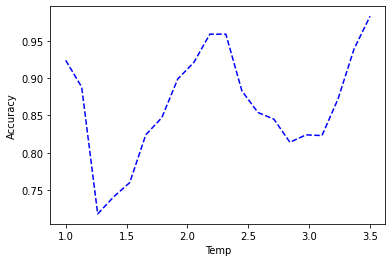

In [5]:
plt.plot(Tp, accuracies,'b--')
plt.ylabel('Accuracy')
plt.xlabel('Temp')

## 1. Unsupervised learning: Phase transition as an error of the predictive model

This is a ML scheme proposed by Eliska Greplova, Agnes Valenti, Gregor Boschung, Frank Schäfer, Niels Lörch, and Sebastian D Huber in [this paper](https://doi.org/10.1088/1367-2630/ab7771). We again avoid the need for labels, this time solving a regression problem where your Ising configurations are still the input data but the output, instead of labels 0/1 corresponding to phases, is the temperature the sample was created for. You will see that the ML model trained to predict the temperature of Ising configurations will have special problems in the vicinity of the phase transition which is how you can distinguish this region.

## Step 1: Import and prepare data

Import should be done already, but this time take original labels (temperatures).

## Step 2: Build a ML model and train it to solve this regression problem

In the first approach, try a CNN with a single Conv2D layer with 16 kernels of size 4x4 with stride 1 and one Dense layer with 32 neurons. Avoid the regularization for now. Train with Adam and use mean squared error as a loss function.

Then experiment :)

## Step 3: Plot results

1. Plot the predicted labels vs. true labels. What can you see from this plot?
2. We have 50 data points per temperature which is why the plot above is scattered. Average results across the same temperature! What do you see now?

## Step 4: Calculate the numerical derivative of this prediction error across the temperatures

You can either use some built-in methods or just calculate the [difference quotient](https://en.wikipedia.org/wiki/Difference_quotient).

## Step 5: Plot the numerical derivative across the temperatures

Do you see the transition? What are advantages and disadvantages of this method?

In [ ]:
# we make a NN to predict temperature with the data above

In [ ]:
print('train_images.shape =', ising_training_configs.shape)
print('train_labels.shape =', ising_training_labels.shape)
print('test_images.shape =', ising_test_configs.shape)
print('test_labels.shape =', ising_test_labels.shape)

train_images.shape = (1000, 30, 30)
train_labels.shape = (1000,)
test_images.shape = (1000, 30, 30)
test_labels.shape = (1000,)


In [ ]:
# Define our model
# we use one conv layer and one dense layer

kernel_size = 4 # kernel size of 4 means that wee are convolving 4x4 patches

# construct model
model = keras.Sequential([
    keras.layers.Conv2D(16, (kernel_size, kernel_size), 
                        strides=(1,1), padding='Valid', 
                        input_shape=(30,30,1), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

# compile the model!!
model.compile(optimizer='adam',
            loss='mean_squared_error') 

In [ ]:
# make a useful function to reshape data to the format that conv layers need
reshape_data = lambda x: np.reshape(x,[x.shape[0],x.shape[1],x.shape[2],1])

# Train the model
model.fit(reshape_data(ising_training_configs), 
          ising_training_labels, 
          epochs = 100, batch_size = 10, verbose=1)

Epoch 1/100
100/100 [==============================] - 1s 7ms/step - loss: 0.5214
Epoch 2/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0393
Epoch 3/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0271
Epoch 4/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0226
Epoch 5/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0178
Epoch 6/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0148
Epoch 7/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0169
Epoch 8/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0163
Epoch 9/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0173
Epoch 10/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0153
Epoch 11/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0147
Epoch 12/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0145
Epoch 13/100


In [ ]:
# Evaluate and save prediction
predict = model.predict(reshape_data(ising_test_configs))

Text(0, 0.5, 'Predicted Temperature, $T_p$')

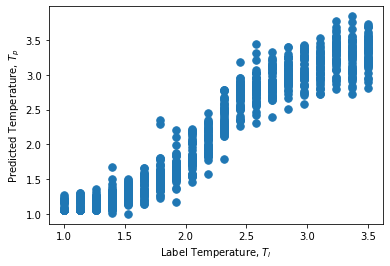

In [ ]:
# Let see if the prediction matches with label data

plt.plot(ising_test_labels,predict,'.',markersize=15)
plt.xlabel(r'Label Temperature, $T_l$')
plt.ylabel(r'Predicted Temperature, $T_p$')

In [ ]:
# the data looks very scattered because we have 50 points per temp
# let us average per temp

pts_per_temp = 50

averaged_test_per_temp = np.mean(np.reshape(ising_test_labels, (1000//pts_per_temp,pts_per_temp)),axis=1)
averaged_predict_per_temp = np.mean(np.reshape(predict, (1000//pts_per_temp,pts_per_temp)),axis=1)

Text(0, 0.5, 'Predicted Temperature, $T_p$')

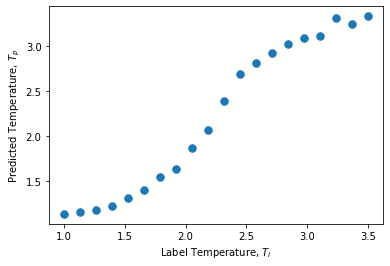

In [ ]:
# now we plot the averaged data
plt.plot(averaged_test_per_temp,averaged_predict_per_temp,'.',markersize=15)

plt.xlabel(r'Label Temperature, $T_l$')
plt.ylabel(r'Predicted Temperature, $T_p$')

Text(0, 0.5, 'Predicted Temp. Derivative, $dT_p / dT_l$')

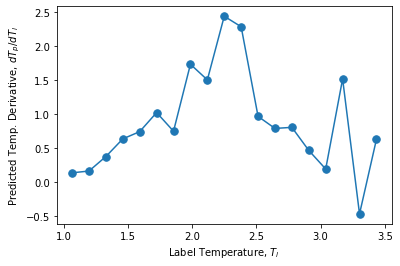

In [ ]:
# we see that the derivative appears largest around the phase transition
# this can be made clearer by taking the numerical derivative

# average temp between two points
mean_temp = (averaged_test_per_temp[:-1]+averaged_test_per_temp[1:])/2

# numerical deriv as diff/dx
deriv = np.diff(averaged_predict_per_temp)/(mean_temp[1]-mean_temp[0])

#we plot
plt.plot(mean_temp,deriv,'.-', markersize=15)

plt.xlabel(r'Label Temperature, $T_l$')
plt.ylabel(r'Predicted Temp. Derivative, $dT_p / dT_l$')

In [ ]:
# we see maximum derivative is where we have the phase transition 